In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path
from scipy.stats import linregress
import plotly.express as px

In [3]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/homelesess_2012_2022.xlsx')
# Read the excel file
homelesess_df = pd.read_excel(file_path)
# Display data
homelesess_df.head()


,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,2320,1949,1949,1907,2016,1845,1940,1956,1784,1946,1913
1,AL,3752,2556,3351,3261,3434,3793,4111,3970,4561,4689,5209
2,AR,2459,2139,2366,2717,2712,2467,2463,2560,2936,3812,4214
3,AS,,,,,,,,,,,
4,AZ,13553,5460,10979,10007,9865,8947,9707,9896,10495,10562,11302


In [4]:
#homelesess_df_new = homelesess_df.apply(lambda col: pd.to_numeric(col, errors='coerce').astype('float') if col.name != 'State' else col)
homelesess_df_no_total = homelesess_df[:-1]
homelesess_df_no_total.head()

,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,2320,1949,1949,1907,2016,1845,1940,1956,1784,1946,1913
1,AL,3752,2556,3351,3261,3434,3793,4111,3970,4561,4689,5209
2,AR,2459,2139,2366,2717,2712,2467,2463,2560,2936,3812,4214
3,AS,,,,,,,,,,,
4,AZ,13553,5460,10979,10007,9865,8947,9707,9896,10495,10562,11302


In [5]:
condition = (homelesess_df_no_total['State'] != 'AS')
# Use boolean indexing to select and keep rows that satisfy the condition
homelesess_df_clean = homelesess_df_no_total[condition]

#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'State'

# Convert all values to float except the specified object column
homelesess_df_clean.loc[:, homelesess_df_clean.columns != object_column] = homelesess_df_clean.loc[:, homelesess_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')
#homelesess_df_numeric = homelesess_df_clean.apply(pd.to_numeric, errors='coerce')
homelesess_df_clean.head()

,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,1946.0,1913.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,4689.0,5209.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,3812.0,4214.0
4,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,10562.0,11302.0
5,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,118552.0,120098.0


KeyError: 'Overall Homeless, '

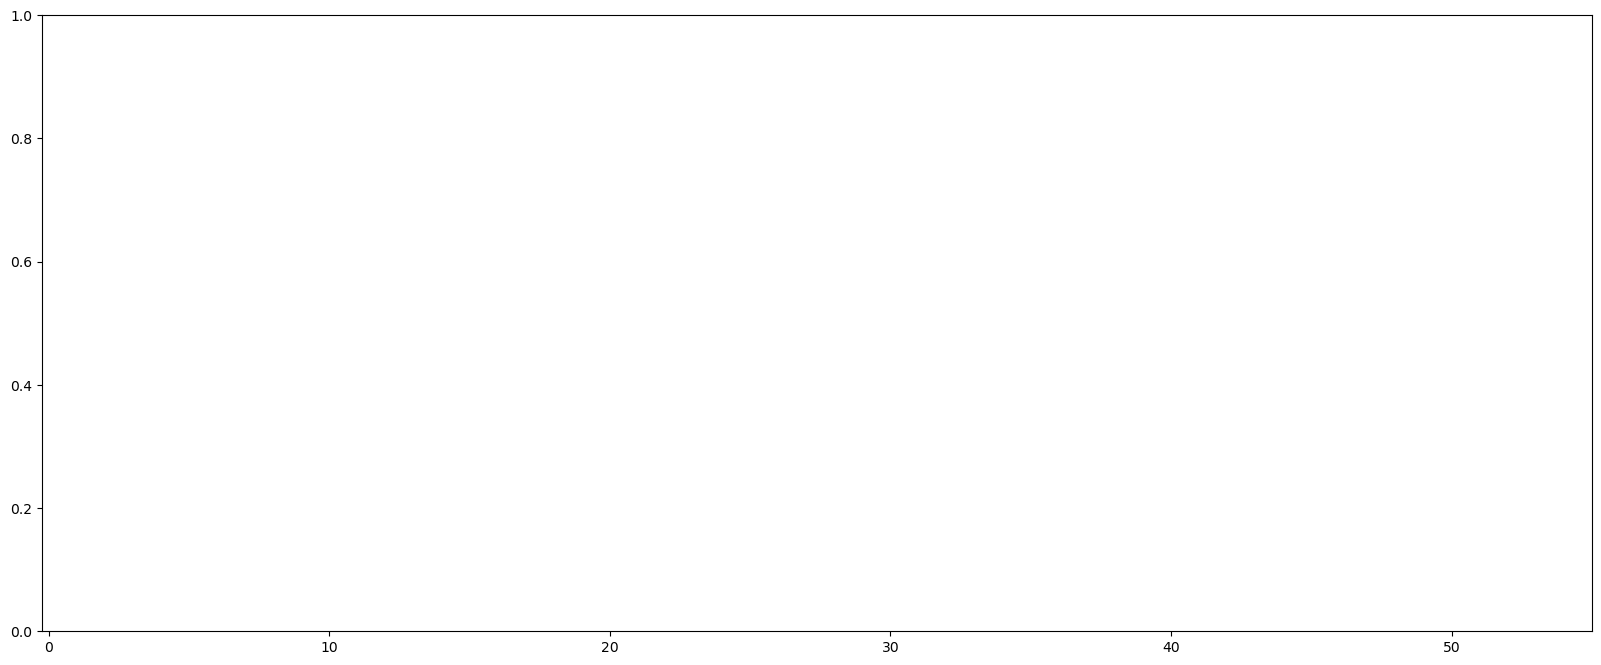

In [6]:
x_axis = np.arange(len(homelesess_df_clean))
value_for_year = input("Enter the year in a range 2012 - 2022: ")
year_value = "Overall Homeless, " + value_for_year
tick_locations = [value + 0.3 for value in x_axis]
plt.figure(figsize=(20,8))
plt.xlim(-0.25, len(x_axis))
plt.bar(x_axis, homelesess_df_clean[year_value], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations , homelesess_df_clean["State"],rotation="vertical",size = 'large')
plt.tight_layout()
y = homelesess_df_clean[year_value]
for index, value in enumerate(y):
    plt.text(index + 0.3, value + 2000,
             str(value), size = 'x-large',rotation="vertical")
plt.savefig("HUD_bar_chat.png")
plt.show()

In [7]:
# Set the 'State' to be our index for easy referencing of rows
if 'State' in homelesess_df_clean.columns:
    homelesess_df_clean.set_index("State", inplace=True)
else:
    print("Warning: 'State' column not found in DataFrame.")
    
homelesess_df_yearly = homelesess_df_clean.rename(columns={'Overall Homeless, 2022' : '2022', 'Overall Homeless, 2021': '2021',
       'Overall Homeless, 2020' : '2020', 'Overall Homeless, 2019' : '2019',
       'Overall Homeless, 2018' : '2018', 'Overall Homeless, 2017' : '2017',
       'Overall Homeless, 2016' : '2016', 'Overall Homeless, 2015' : '2015',
       'Overall Homeless, 2014': '2014', 'Overall Homeless, 2013' : '2013',
       'Overall Homeless, 2012': '2012'})
homelesess_df_yearly.head()
homelesess_df_yearly.to_csv('../Resources/HUD_States_Data.csv')

In [ ]:
#Enter state code to plot graph
state_value = input('Enter state code : ')
# Collect the homelesess number
average_homelesess = homelesess_df_yearly[[str(year) for year in range(2012, 2023)]].mean()

# Collect the years where data was collected
years = average_homelesess.keys()
# Plot the homelesess values for a single state
state_one, = plt.plot(years, homelesess_df_yearly.loc[state_value,["2012","2013","2014","2015","2016","2017",
                                                                  "2018","2019","2020","2021","2022"]],
                        color="blue",label=homelesess_df_yearly.loc[state_value])

# Create a legend for our chart
plt.legend(handles=[state_one], loc="best")
plt.savefig("HUD_state_graph")
# Show the chart
plt.show()

In [8]:
# Rental file 
rent_data = Path("../Resources/Rental_USA_csv.csv")
rent_df = pd.read_csv(rent_data)
rent_df.columns = rent_df.iloc[0]
rent_df.drop(0, inplace=True)
rent_df.set_index("State", inplace=True)
rent_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,
AK,1745,1856,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
AL,1003,947,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
AR,809,850,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
AZ,1218,1162,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609
CA,2059,2013,2031,2132,2237,2345,2465,2469,2555,2619,2585,3040,3143


In [9]:
rent_df= rent_df[rent_df.columns[::-1]] 
rent_df

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
State,,,,,,,,,,,,,
AK,2420,2340,1990,2016,1967,1900,1903,1940,1957,1909,1908,1856,1745
AL,1282,1240,1054,1068,1042,1007,1016,958,1103,1022,945,947,1003
AR,1379,1334,1134,1149,1121,1083,1081,1045,1075,953,929,850,809
AZ,1609,1556,1323,1340,1307,1263,1260,1227,1222,1210,1201,1162,1218
CA,3143,3040,2585,2619,2555,2469,2465,2345,2237,2132,2031,2013,2059
CO,2523,2440,2075,2102,2051,1982,1993,1977,1761,1640,1498,1480,1344
CT,2427,2347,1996,2022,1973,1906,1910,1904,1775,1832,1745,1741,1728
DC,3271,3163,2690,2725,2659,2569,2560,2534,2452,2488,2397,2335,2203
DE,1460,1412,1201,1217,1187,1147,1150,1107,1155,1158,1207,1220,1285


In [10]:
rent_df.columns = [str(col) + '_rental' for col in rent_df.columns]



In [11]:
homelesess_df_yearly.columns = [str(col) + '_homelesess' for col in homelesess_df_yearly.columns]

In [12]:
homelesess_df_yearly.head()

,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,2013_homelesess,2012_homelesess
State,,,,,,,,,,,
AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,1946.0,1913.0
AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,4689.0,5209.0
AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,3812.0,4214.0
AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,10562.0,11302.0
CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,118552.0,120098.0


In [13]:
rent_df.head()

,2022_rental,2021_rental,2020_rental,2019_rental,2018_rental,2017_rental,2016_rental,2015_rental,2014_rental,2013_rental,2012_rental,2011_rental,2010_rental
State,,,,,,,,,,,,,
AK,2420,2340,1990,2016,1967,1900,1903,1940,1957,1909,1908,1856,1745
AL,1282,1240,1054,1068,1042,1007,1016,958,1103,1022,945,947,1003
AR,1379,1334,1134,1149,1121,1083,1081,1045,1075,953,929,850,809
AZ,1609,1556,1323,1340,1307,1263,1260,1227,1222,1210,1201,1162,1218
CA,3143,3040,2585,2619,2555,2469,2465,2345,2237,2132,2031,2013,2059


In [14]:
merge_DF = pd.merge(homelesess_df_yearly, rent_df, on = "State", how ="left")
merge_DF.head()

,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,2013_homelesess,...,2019_rental,2018_rental,2017_rental,2016_rental,2015_rental,2014_rental,2013_rental,2012_rental,2011_rental,2010_rental
State,,,,,,,,,,,,,,,,,,,,,
AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,1946.0,...,2016.0,1967.0,1900.0,1903.0,1940.0,1957.0,1909.0,1908.0,1856.0,1745.0
AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,4689.0,...,1068.0,1042.0,1007.0,1016.0,958.0,1103.0,1022.0,945.0,947.0,1003.0
AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,3812.0,...,1149.0,1121.0,1083.0,1081.0,1045.0,1075.0,953.0,929.0,850.0,809.0
AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,10562.0,...,1340.0,1307.0,1263.0,1260.0,1227.0,1222.0,1210.0,1201.0,1162.0,1218.0
CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,118552.0,...,2619.0,2555.0,2469.0,2465.0,2345.0,2237.0,2132.0,2031.0,2013.0,2059.0


In [15]:
merge_DF.columns

Index(['2022_homelesess', '2021_homelesess', '2020_homelesess',
       '2019_homelesess', '2018_homelesess', '2017_homelesess',
       '2016_homelesess', '2015_homelesess', '2014_homelesess',
       '2013_homelesess', '2012_homelesess', '2022_rental', '2021_rental',
       '2020_rental', '2019_rental', '2018_rental', '2017_rental',
       '2016_rental', '2015_rental', '2014_rental', '2013_rental',
       '2012_rental', '2011_rental', '2010_rental'],
      dtype='object')

In [16]:
merge_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, AK to WY
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2022_homelesess  55 non-null     object 
 1   2021_homelesess  55 non-null     object 
 2   2020_homelesess  55 non-null     object 
 3   2019_homelesess  55 non-null     object 
 4   2018_homelesess  55 non-null     object 
 5   2017_homelesess  55 non-null     object 
 6   2016_homelesess  54 non-null     object 
 7   2015_homelesess  54 non-null     object 
 8   2014_homelesess  54 non-null     object 
 9   2013_homelesess  54 non-null     object 
 10  2012_homelesess  54 non-null     object 
 11  2022_rental      49 non-null     float64
 12  2021_rental      49 non-null     float64
 13  2020_rental      49 non-null     float64
 14  2019_rental      49 non-null     float64
 15  2018_rental      49 non-null     float64
 16  2017_rental      49 non-null     float64
 17  2016_rental      49 no

In [17]:
del merge_DF["2010_rental"]
del merge_DF["2011_rental"]


In [18]:
merge_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, AK to WY
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2022_homelesess  55 non-null     object 
 1   2021_homelesess  55 non-null     object 
 2   2020_homelesess  55 non-null     object 
 3   2019_homelesess  55 non-null     object 
 4   2018_homelesess  55 non-null     object 
 5   2017_homelesess  55 non-null     object 
 6   2016_homelesess  54 non-null     object 
 7   2015_homelesess  54 non-null     object 
 8   2014_homelesess  54 non-null     object 
 9   2013_homelesess  54 non-null     object 
 10  2012_homelesess  54 non-null     object 
 11  2022_rental      49 non-null     float64
 12  2021_rental      49 non-null     float64
 13  2020_rental      49 non-null     float64
 14  2019_rental      49 non-null     float64
 15  2018_rental      49 non-null     float64
 16  2017_rental      49 non-null     float64
 17  2016_rental      49 no

In [19]:
merge_DF.dropna(how ='any',inplace=True)
merge_DF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, AK to WV
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2022_homelesess  49 non-null     object 
 1   2021_homelesess  49 non-null     object 
 2   2020_homelesess  49 non-null     object 
 3   2019_homelesess  49 non-null     object 
 4   2018_homelesess  49 non-null     object 
 5   2017_homelesess  49 non-null     object 
 6   2016_homelesess  49 non-null     object 
 7   2015_homelesess  49 non-null     object 
 8   2014_homelesess  49 non-null     object 
 9   2013_homelesess  49 non-null     object 
 10  2012_homelesess  49 non-null     object 
 11  2022_rental      49 non-null     float64
 12  2021_rental      49 non-null     float64
 13  2020_rental      49 non-null     float64
 14  2019_rental      49 non-null     float64
 15  2018_rental      49 non-null     float64
 16  2017_rental      49 non-null     float64
 17  2016_rental      49 no

In [20]:
merge_DF.to_csv("../Resources/merge_file.csv")

In [21]:
merge_data = Path("../Resources/merge_file.csv")
merge_df = pd.read_csv(merge_data)
merge_df.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2021_rental,2020_rental,2019_rental,2018_rental,2017_rental,2016_rental,2015_rental,2014_rental,2013_rental,2012_rental
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,2340.0,1990.0,2016.0,1967.0,1900.0,1903.0,1940.0,1957.0,1909.0,1908.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1240.0,1054.0,1068.0,1042.0,1007.0,1016.0,958.0,1103.0,1022.0,945.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,1334.0,1134.0,1149.0,1121.0,1083.0,1081.0,1045.0,1075.0,953.0,929.0
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1556.0,1323.0,1340.0,1307.0,1263.0,1260.0,1227.0,1222.0,1210.0,1201.0
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,3040.0,2585.0,2619.0,2555.0,2469.0,2465.0,2345.0,2237.0,2132.0,2031.0


In [23]:
state_correlation = []
p_value_correlation = []

for k in merge_df["State"].index:
    homelesess = merge_df.iloc[k,1:12].values
    rental_price=merge_df.iloc[k,12:24].values
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(homelesess.astype(int), rental_price.astype(int))
    state_correlation.append(pe_r)
    p_value_correlation.append(pe_p)
    
state_correlation
    

[0.7032699158867,
 -0.5401698082906344,
 -0.7293032649055923,
 -0.08116113854907588,
 0.08526594988822515,
 -0.5864216882578707,
 -0.8126363860373677,
 -0.8896202899457616,
 0.9092862387030219,
 -0.8913837656671405,
 -0.8197139746785923,
 -0.5795651198821752,
 -0.6602339034331199,
 0.08358068871767334,
 -0.8510344810226538,
 -0.6951466484234711,
 -0.5368653080975704,
 -0.7538956786956933,
 0.11610161214340858,
 -0.6845013714734712,
 -0.9314993679703446,
 0.3535260061994191,
 -0.8039070726308136,
 -0.39066272481941383,
 -0.8897765018130165,
 -0.16098280106915572,
 -0.7018029831238649,
 -0.3217265790093112,
 -0.9023937506823502,
 0.41719035826646456,
 -0.7828607145369638,
 -0.04304561761185524,
 -0.49334961426540697,
 -0.4336043393658582,
 -0.6957100125021061,
 -0.7621767668600055,
 -0.007925107999305755,
 -0.8310621459897568,
 0.3137332761197743,
 -0.7113902122450045,
 0.3546001332873305,
 -0.29039288728404006,
 -0.7234249758266915,
 0.3119717148045225,
 -0.42629004206038074,
 0.8066778

In [35]:
fig = px.choropleth(locations=merge_df["State"], locationmode="USA-states", 
                    color=state_correlation, scope="usa", 
                    color_continuous_scale="Viridis")
fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig.layout.coloraxis.colorbar.title = 'Correlation Coefficients'
fig.show()

In [27]:
def linear_regression_plot(x, y):
    # Perform linear regression
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x, y.astype(int))
    regression_line = pe_slope * np.array(x) + pe_int

    print(f'The r-value is: {round(pe_r,2)}')

    # Plotting
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, regression_line, color='red', label='Linear Regression')
    plt.annotate(f'y = {round(pe_slope,2)}x + {round(pe_int,2)}', xy=(min(x)+5,min(y)), 
                 xycoords='data', color='red', size=15)

The r-value is: 0.09


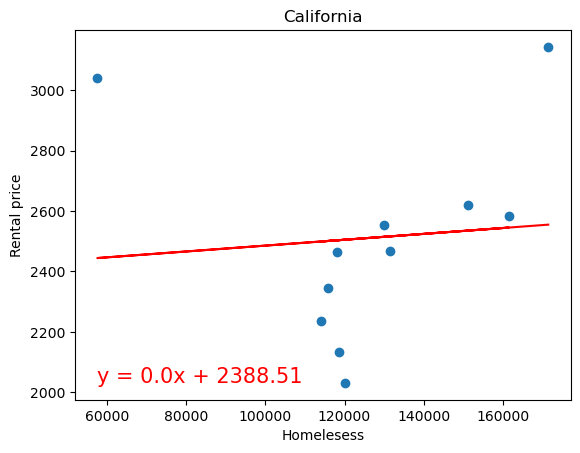

In [39]:
ca_idx = merge_df.loc[merge_df["State"]=='CA'].index
ca_idx = ca_idx[0]
homelesess_CA = merge_df.iloc[ca_idx,1:12].values
rental_price_CA=merge_df.iloc[ca_idx,12:24].values
linear_regression_plot(homelesess_CA.astype(int), rental_price_CA.astype(int))
plt.title("California")
plt.xlabel("Homelesess")
plt.ylabel("Rental price")
plt.show()

The r-value is: -0.93


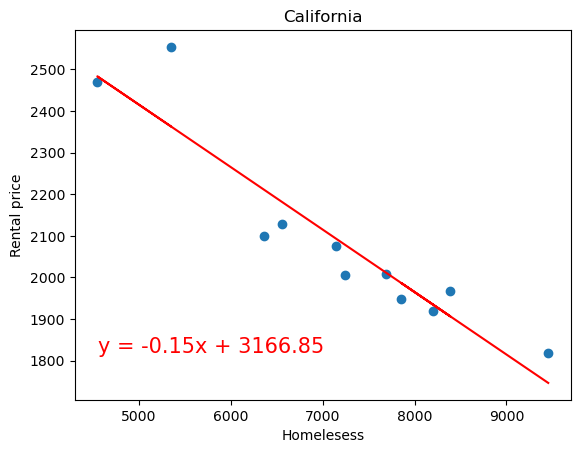

In [44]:
val_min = min(state_correlation)
idx= state_correlation.index(val_min)
idx
homelesess_CA = merge_df.iloc[idx,1:12].values
rental_price_CA=merge_df.iloc[idx,12:24].values
linear_regression_plot(homelesess_CA.astype(int), rental_price_CA.astype(int))
plt.title("California")
plt.xlabel("Homelesess")
plt.ylabel("Rental price")
plt.show()